<a href="https://colab.research.google.com/github/ManishR17/5731-Computational-methods/blob/master/Yachavarapu_ManishReddy_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [5]:
# Write your code here


import csv
import re
import nltk
nltk.download('averaged_perceptron_tagger')

# Function to preprocess text (remove punctuation, convert to lowercase)
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Function to calculate trigrams frequency
def calculate_trigrams_frequency(reviews):
    trigrams_frequency = {}
    for review in reviews:
        review = preprocess_text(review)
        words = review.split()
        for i in range(len(words) - 2):
            trigram = tuple(words[i:i+3])
            if trigram in trigrams_frequency:
                trigrams_frequency[trigram] += 1
            else:
                trigrams_frequency[trigram] = 1
    return trigrams_frequency

# Function to calculate bigram probabilities
def calculate_bigram_probabilities(reviews):
    bigrams_count = {}
    unigrams_count = {}

    for review in reviews:
        review = preprocess_text(review)
        words = review.split()
        for i in range(len(words) - 1):
            bigram = tuple(words[i:i+2])
            unigram = words[i]
            if bigram in bigrams_count:
                bigrams_count[bigram] += 1
            else:
                bigrams_count[bigram] = 1

            if unigram in unigrams_count:
                unigrams_count[unigram] += 1
            else:
                unigrams_count[unigram] = 1

    bigram_probabilities = {}
    for bigram, count in bigrams_count.items():
        unigram = bigram[0]
        if unigram in unigrams_count:
            unigram_count = unigrams_count[unigram]
            bigram_probabilities[bigram] = count / unigram_count

    return bigram_probabilities

# Function to extract noun phrases
def extract_noun_phrases(reviews):
    noun_phrases = []
    for review in reviews:
        review = preprocess_text(review)
        tokens = nltk.word_tokenize(review)
        tagged_tokens = nltk.pos_tag(tokens)
        noun_phrase = [word for word, pos in tagged_tokens if pos == 'NN' or pos == 'NNS']
        noun_phrases.append(noun_phrase)
    return noun_phrases

# Function to calculate relative probabilities of noun phrases
def calculate_noun_phrase_probabilities(noun_phrases):
    noun_phrase_frequency = {}
    for phrases in noun_phrases:
        for phrase in phrases:
            if phrase in noun_phrase_frequency:
                noun_phrase_frequency[phrase] += 1
            else:
                noun_phrase_frequency[phrase] = 1

    max_frequency = max(noun_phrase_frequency.values())

    noun_phrase_probabilities = {}
    for phrase, frequency in noun_phrase_frequency.items():
        noun_phrase_probabilities[phrase] = frequency / max_frequency

    return noun_phrase_probabilities

# Read IMDb reviews from CSV file
reviews = []
with open('imdb_reviews.csv', mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header row
    for row in reader:
        reviews.append(row[0])

# Calculate trigrams frequency
trigrams_frequency = calculate_trigrams_frequency(reviews)

# Calculate bigram probabilities
bigram_probabilities = calculate_bigram_probabilities(reviews)

# Extract noun phrases
noun_phrases = extract_noun_phrases(reviews)

# Calculate noun phrase probabilities
noun_phrase_probabilities = calculate_noun_phrase_probabilities(noun_phrases)

# Print results
print("Trigrams Frequency:")
for trigram, frequency in trigrams_frequency.items():
    print(f"{trigram}: {frequency}")

print("\nBigram Probabilities:")
for bigram, probability in bigram_probabilities.items():
    print(f"{bigram}: {probability}")

print("\nNoun Phrase Probabilities:")
for phrase, probability in noun_phrase_probabilities.items():
    print(f"{phrase}: {probability}")




[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Streaming output truncated to the last 5000 lines.
('is', 'without'): 0.006493506493506494
('a', 'doubt'): 0.003436426116838488
('doubt', 'the'): 0.3333333333333333
('very', 'same'): 0.038461538461538464
('same', 'storythe'): 0.2
('storythe', 'answer'): 1.0
('answer', 'i'): 1.0
('think', 'is'): 0.09090909090909091
('books', 'portray'): 0.038461538461538464
('portray', 'much'): 1.0
('harrys', 'anxiety'): 0.1111111111111111
('anxiety', 'in'): 1.0
('to', 'succeed'): 0.00411522633744856
('succeed', 'in'): 1.0
('in', 'school'): 0.00641025641025641
('for', 'if'): 0.011764705882352941
('if', 'hes'): 0.04
('hes', 'kicked'): 0.1
('kicked', 'out'): 1.0
('out', 'hell'): 0.04
('hell', 'go'): 1.0
('go', 'straight'): 0.125
('straight', 'back'): 1.0
('back', 'to'): 0.14285714285714285
('his', 'horrible'): 0.029411764705882353
('horrible', 'uncle'): 0.5
('and', 'fit'): 0.003257328990228013
('in', 'with'): 0.01282051282051282
('kids', 'there'): 0.05263157894736842
('movie', 'doesnt'): 0.008849557522123

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [3]:
# Write your code here

import csv
import nltk
nltk.download('punkt')
import math

# Function to tokenize text
def tokenize_text(text):
    return nltk.word_tokenize(text)

# Function to preprocess text (remove punctuation, convert to lowercase)
def preprocess_text(text):
    tokens = tokenize_text(text)
    return [token.lower() for token in tokens if token.isalnum()]

# Function to calculate term frequency (TF)
def calculate_tf(document):
    word_count = len(document)
    word_freq = {}
    for word in document:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
    return {word: freq / word_count for word, freq in word_freq.items()}

# Function to calculate inverse document frequency (IDF)
def calculate_idf(documents, term):
    total_documents = len(documents)
    documents_with_term = sum(1 for document in documents if term in document)
    if documents_with_term > 0:
        idf = math.log(total_documents / documents_with_term)
    else:
        idf = 0
    return idf

# Function to build documents-terms weights (TF-IDF) matrix
def build_tf_idf_matrix(documents):
    all_terms = set()
    for document in documents:
        all_terms.update(document)

    tf_idf_matrix = {}
    for term in all_terms:
        idf = calculate_idf(documents, term)
        tf_idf_matrix[term] = {}
        for i, document in enumerate(documents):
            tf = calculate_tf(document)
            if term in tf:
                tf_idf_matrix[term][i] = tf[term] * idf
            else:
                tf_idf_matrix[term][i] = 0
    return tf_idf_matrix

# Function to calculate cosine similarity between two vectors
def cosine_similarity(vector1, vector2):
    dot_product = sum(vector1[key] * vector2.get(key, 0) for key in vector1)
    magnitude1 = math.sqrt(sum(value ** 2 for value in vector1.values()))
    magnitude2 = math.sqrt(sum(value ** 2 for value in vector2.values()))
    if magnitude1 == 0 or magnitude2 == 0:
        return 0
    else:
        return dot_product / (magnitude1 * magnitude2)

# Function to rank documents based on cosine similarity with a query
def rank_documents(documents, query, tf_idf_matrix):
    query_vector = {term: calculate_tf(preprocess_text(query)).get(term, 0) * calculate_idf(documents, term) for term in tf_idf_matrix}
    similarities = [(i, cosine_similarity(query_vector, document_vector)) for i, document_vector in enumerate(tf_idf_matrix.values())]
    return sorted(similarities, key=lambda x: x[1], reverse=True)

# Load IMDb reviews from CSV file
reviews = []
with open('imdb_reviews.csv', mode='r', newline='', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header row
    for row in reader:
        reviews.append(preprocess_text(row[0]))

# Build TF-IDF matrix
tf_idf_matrix = build_tf_idf_matrix(reviews)

# Design a query
query = "An Outstanding movie with a haunting performance and best character development"

# Rank documents based on cosine similarity with the query
ranked_documents = rank_documents(reviews, query, tf_idf_matrix)

# Print ranked documents
print("Ranked Documents:")
for i, similarity in ranked_documents:
    print(f"Document {i+1}: Similarity = {similarity:.4f}")






[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Ranked Documents:
Document 1: Similarity = 0.0000
Document 2: Similarity = 0.0000
Document 3: Similarity = 0.0000
Document 4: Similarity = 0.0000
Document 5: Similarity = 0.0000
Document 6: Similarity = 0.0000
Document 7: Similarity = 0.0000
Document 8: Similarity = 0.0000
Document 9: Similarity = 0.0000
Document 10: Similarity = 0.0000
Document 11: Similarity = 0.0000
Document 12: Similarity = 0.0000
Document 13: Similarity = 0.0000
Document 14: Similarity = 0.0000
Document 15: Similarity = 0.0000
Document 16: Similarity = 0.0000
Document 17: Similarity = 0.0000
Document 18: Similarity = 0.0000
Document 19: Similarity = 0.0000
Document 20: Similarity = 0.0000
Document 21: Similarity = 0.0000
Document 22: Similarity = 0.0000
Document 23: Similarity = 0.0000
Document 24: Similarity = 0.0000
Document 25: Similarity = 0.0000
Document 26: Similarity = 0.0000
Document 27: Similarity = 0.0000
Document 28: Similarity = 0.0000
Document 29: Similarity = 0.0000
Document 30: Similarity = 0.0000
D

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

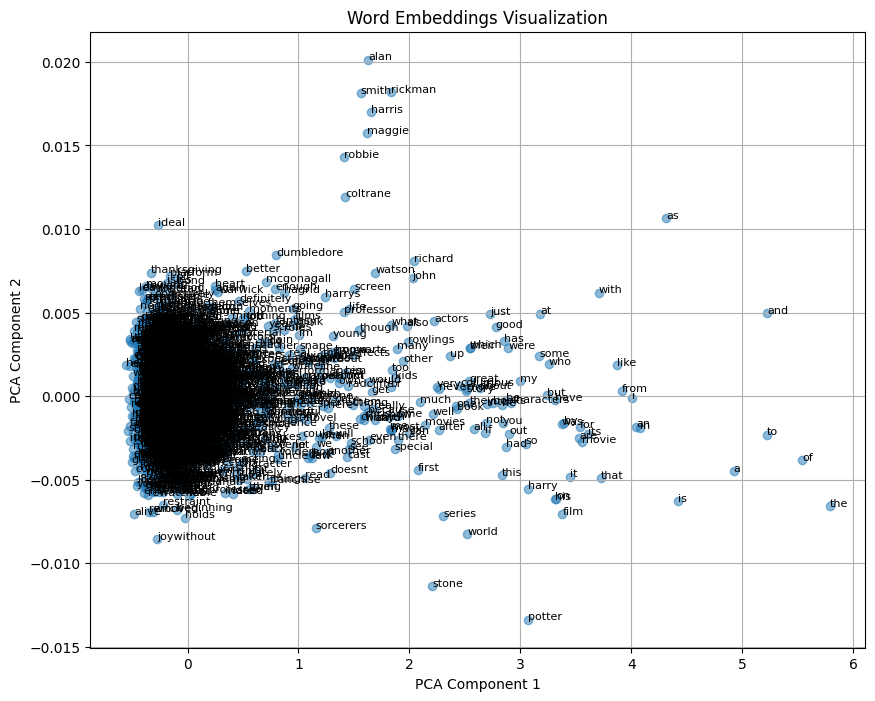

In [6]:
# Write your code here


from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import csv
import nltk
import re

# Function to preprocess text (remove punctuation, convert to lowercase)
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Function to tokenize and preprocess each review
def preprocess_reviews(reviews):
    preprocessed_reviews = []
    for review in reviews:
        preprocessed_review = preprocess_text(review)
        preprocessed_reviews.append(nltk.word_tokenize(preprocessed_review))
    return preprocessed_reviews

# Read data from CSV file
reviews = []
with open('imdb_reviews.csv', mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header row
    for row in reader:
        reviews.append(row[0])

# Preprocess reviews
preprocessed_reviews = preprocess_reviews(reviews)

# Train Word2Vec model
model = Word2Vec(sentences=preprocessed_reviews, vector_size=300, window=5, min_count=1, workers=4)

# Visualize word embeddings
words = list(model.wv.index_to_key)
word_vectors = model.wv[words]

# Perform PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Plot word embeddings
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]), fontsize=8)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Word Embeddings Visualization')
plt.grid(True)
plt.show()





## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/ManishR17/5731-Computational-methods



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [7]:
# Type your answer
'''
i have a issue with my assignment 2 data set, i have used amazon product but i cant find that product,
i used data set used in my previous exercises, please consider this data set,
coming to this assignment i have learned new topics in this assignment, though i have faced challenges
i enjoyed it, and provided time for this assignment is sufficient,
here in this assignment i saved reviews scrapped from imdb and i used that csv file for this assignment,
i faced challenge in manually wirting the sentiment analysis for each review, creating the new csv file,
and overall assignment is taught me a lot.

'''

'\ni have a issue with \n'